## Tracer la relation de dispersion $\omega$ et la vitesse de  phase $v_\phi$ en fonction de $\lambda$ et $k$

#### Prérequis communs: définition des fonctions et chargement des modules

In [135]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


# CONSTANTES
g = 10 # m/s^-2
gamma = 0.075 # facteur de tension superficielle : 75.10^-3 N/m
mu = 1000 # densité volumique de l'eau 1000 kg/m^3
lc = np.sqrt(gamma/mu/g) # longueur caractéristique capillaire (en mètres)

def omega_k(h,k):
    return np.sqrt(g*k*(1+k**2*lc**2)*np.tanh(k*h))

def omega_l(h,l):
    k = 2*np.pi/l
    return np.sqrt(g*k*(1+k**2*lc**2)*np.tanh(k*h))

def v_phi(h,l):
    k = 2*np.pi/l
    return np.sqrt(g/k*(1+k**2*lc**2)*np.tanh(k*h))


### Relation de dispersion

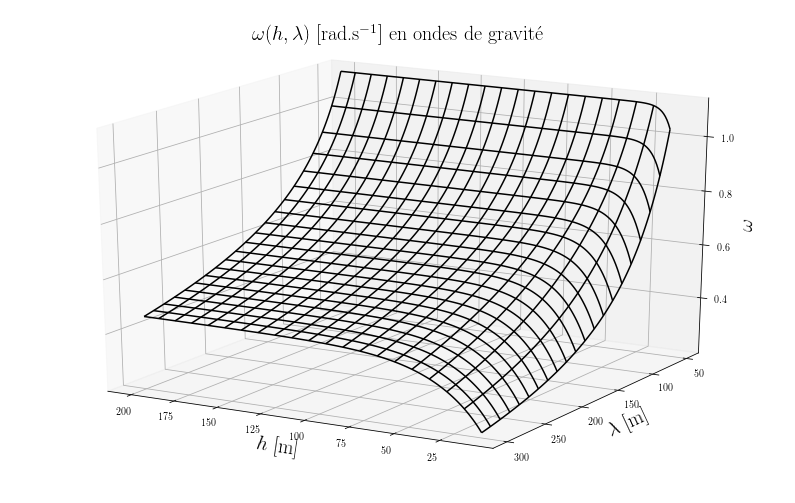

<Figure size 432x288 with 0 Axes>

In [136]:
# Make data.
Vl = np.linspace(50, 300, 200) # rentrer ici l'étdendue des lambda
Vh = np.linspace(10, 200, 200) # rentrer ici l'étentue des j
X, Y = np.meshgrid(Vh, Vl)
R = omega_l(X,Y)


fig00 = plt.figure(figsize=(14, 9))
ax00 = plt.subplot(projection='3d')
# ax = fig.gca(projection='3d')
ax00.set_xlabel('$h$ [m]', fontsize=20)
ax00.set_ylabel('$\lambda$ [m]', fontsize=20)
ax00.set_zlabel('$\omega$', fontsize=20)
ax00.set_title('$\omega (h,\lambda)$ [rad.s$^{-1}$] en ondes de gravité', fontsize=20)


# Plot the surface.
surf = ax00.plot_wireframe(X, Y, R, rstride=10, cstride=10, color='black')


ax00.view_init(elev=20, azim=120)

plt.show()
plt.savefig(chemin+'relation_dispersion.pdf', dpi=500, bbox_inches='tight', facecolor='w', edgecolor='w',orientation='portrait')

### Vitesse de phase en fonction de $h$ et $\lambda$

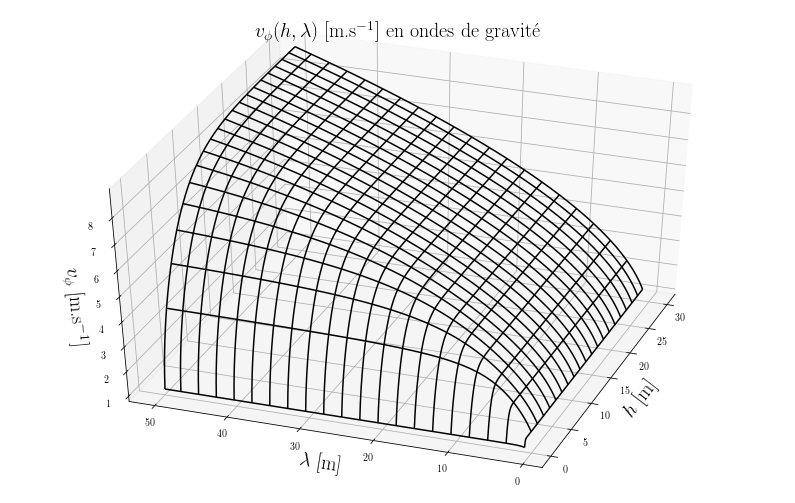

In [196]:
# Make data.
Vl = np.linspace(1, 50, 200) # rentrer ici l'étdendue des lambda
Vh = np.linspace(.1, 30, 200) # rentrer ici l'étentue des h
X, Y = np.meshgrid(Vh, Vl)
R = v_phi(X,Y)


fig00 = plt.figure(figsize=(14, 9))
ax00 = plt.subplot(projection='3d')
# ax = fig.gca(projection='3d')
ax00.set_xlabel('$h$ [m]', fontsize=20)
ax00.set_ylabel('$\lambda$ [m]', fontsize=20)
ax00.set_zlabel('$v_\phi$ [m.s$^{-1}$]', fontsize=20)
ax00.set_title('$v_\phi (h,\lambda)$ [m.s$^{-1}$] en ondes de gravité', fontsize=20)


# Plot the surface.
surf = ax00.plot_wireframe(X, Y, R, rstride=10, cstride=10, color='black')


ax00.view_init(elev=40, azim=200)


plt.savefig(chemin+'v_phi_grille.pdf', dpi=500, bbox_inches='tight', facecolor='w', edgecolor='w',orientation='portrait')


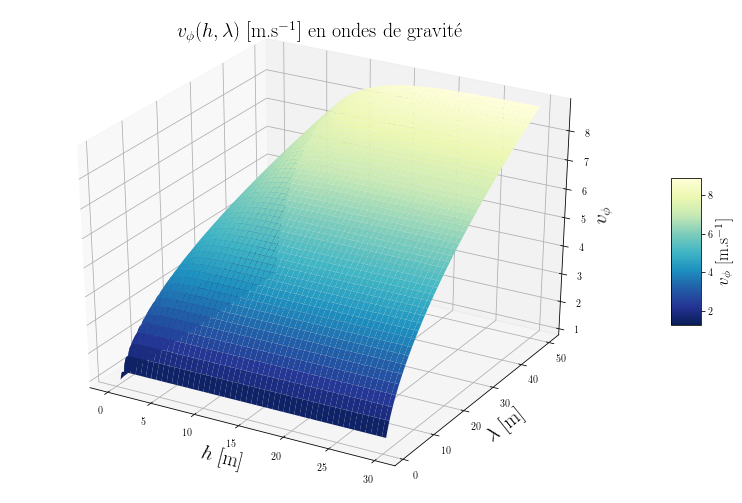

<Figure size 432x288 with 0 Axes>

In [37]:
# Make data.
Vl = np.linspace(1, 50, 200) # rentrer ici l'étdendue des lambda
Vh = np.linspace(.1, 30, 200) # rentrer ici l'étentue des h
X, Y = np.meshgrid(Vh, Vl)
R = v_phi(X,Y)


fig00 = plt.figure(figsize=(14, 9))
ax00 = plt.subplot(projection='3d')
# ax = fig.gca(projection='3d')
ax00.set_xlabel('$h$ [m]', fontsize=20)
ax00.set_ylabel('$\lambda$ [m]', fontsize=20)
ax00.set_zlabel('$v_\phi$', fontsize=20)
ax00.set_title('$v_\phi (h,\lambda)$ [m.s$^{-1}$] en ondes de gravité', fontsize=20)


# Plot the surface.
surf = ax00.plot_surface(X, Y, R, cmap=plt.cm.YlGnBu_r, linewidth=0, antialiased=True) # cm.coolwarm

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
bar = fig00.colorbar(surf, shrink=0.3, aspect=5)
bar.set_label('$v_\phi$ [m.s$^{-1}$]', fontsize=17)
ax00.view_init(elev=30, azim=300)

plt.show()
plt.savefig(chemin+'v_phi_coul.pdf', dpi=500, bbox_inches='tight', facecolor='w', edgecolor='w',orientation='portrait')

### Vitesse de phase en fonction de $\lambda$

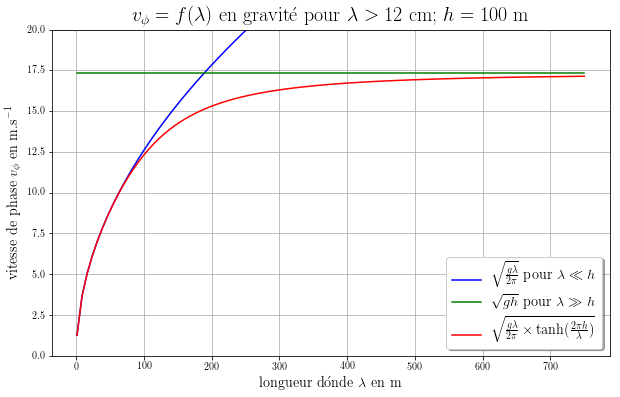

In [201]:
L = np.linspace(1,750,100)
g = 10
h = 30

fig = plt.figure(figsize=(10,6))


plt.plot(L, [np.sqrt(g*l/2/np.pi) for l in L], color = 'blue', label = r'$\sqrt{\frac{g \lambda}{2 \pi}}$ pour $\lambda \ll h$')
plt.plot(L, [np.sqrt(g*h) for l in L], color = 'green', label = r'$\sqrt{gh}$ pour $\lambda \gg h$')
plt.plot(L, [np.sqrt(g*(l/2/np.pi)*np.tanh(h*(2*np.pi/l))) for l in L], color = 'red', label = r'$\sqrt{\frac{g \lambda}{2 \pi} \times \tanh  (\frac{2 \pi h}{\lambda})}$')
plt.ylim(0, 20)


plt.title("$v_\phi = f(\lambda)$ en gravité pour $\lambda >  12$ cm; $h = 100$ m", fontsize=20)
plt.ylabel('vitesse de phase $v_\phi$ en m.s$^{-1}$', fontsize='x-large')
plt.xlabel(r'longueur d\' onde $\lambda$ en m', fontsize='x-large')
legend = plt.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.grid(True)
#plt.savefig('evol.pdf')
plt.savefig(chemin+'v_phi_plan.pdf', dpi=500, bbox_inches='tight', facecolor='w', edgecolor='w',orientation='portrait')

# 3D: SURFACE DE L'OCÉAN, VITESSES, POTENTIELS, etc
voir aussi https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

#### Prérequis et modification de la couleur de la carte
(d'après https://scipy-cookbook.readthedocs.io/items/Matplotlib_ColormapTransformations.html)

https://matplotlib.org/cmocean/

shading https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/shading_example.html

https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.16-3D-Surface-Plots/

In [8]:
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def modif_couleur(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector
    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

#### Définition des Fonctions 3D

In [9]:
# DÉFINITION DES FONCTIONS

# le vecteur r contient les composantes x et y (tableau numpy de dimensions 1x2)
# le vecteur k contient les composantes kx et ky (idem)
def prod_scal(k,r):
    return k[0]*r[0]+k[1]*r[1] # k = kx sur ex + ky sur ey (pas de composante selon Oz évidemment)

def norme(v):
    return np.sqrt(k[0]**2+k[1]**2)


psi3d = lambda z,nk,A: A*np.cosh(nk*z)                                    # amplitude du potentiel des vitesses
ondul3d = lambda r,z,k,omega,t: np.exp(1j*(omega*t-prod_scal(k,r)))       # le terme de phase: l'exponentielle complexe
phi3d = lambda r,z,k,nk,A,omega,t: psi3d(z,nk,A)*ondul3d(r,z,k,omega,t)       # champ scalaire potentiel des vitesses
vx3d = lambda r,z,k,nk,A,omega,t: -k[0]*phi3d(r,z,k,nk,A,omega,t)           # composante des vitesses selon l'axe (Ox)
vy3d = lambda r,z,k,nk,A,omega,t: -k[1]*phi3d(r,z,k,nk,A,omega,t)           # composante des vitesses selon l'axe (Oy)
vz3d = lambda r,z,k,nk,A,omega,t: A*nk*np.sinh(nk*z)*ondul3d(r,z,k,omega,t) # composante des vitesses selon l'axe (Oz)

def surface3d(R,k,H,omega, t=0):
    """ renvoie la hauteur algébrique de la perturbation sur une grille ou des valeurs """
    return H/2*np.sin(omega*t-prod_scal(k,R))

def vitesse3d(R,Z,k,nk,A,omega, t=0):
    """ renvoie les valeurs des 3 composantes du champ des vitesses sur une grille ou des valeurs """
    return np.real(vx3d(R,Z,k,nk,A,omega,t)), np.real(vy3d(R,Z,k,nk,A,omega,t)), np.real(vz3d(R,Z,k,nk,A,omega,t))

def potentiel3d(R,Z,k,nk,A,omega, t=0):
    """ renvoie les valeurs du potentiel sur une grille ou des valeurs """
    return np.real(phi3d(R,Z,k,nk,A,omega,t))

#### Paramètres communs

In [10]:
# PARAMÈTRES
h = 200 # épaisseur d'eau non perturbée en mètres [PARAMÈTRE]

# CONSTANTES
g = 10 # m/s^-2
gamma = 0.075 # facteur de tension superficielle : 75.10^-3 N/m
mu = 1000 # densité volumique de l'eau 1000 kg/m^3
lc = np.sqrt(gamma/mu/g) # longueur caractéristique capillaire (en mètres)

### Champ des vitesses en 3D

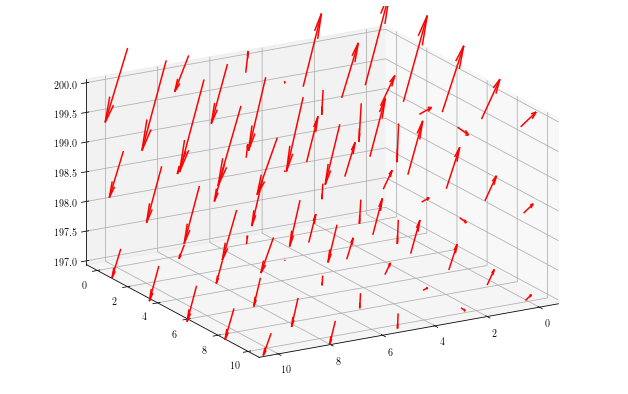

In [124]:
# This import registers the 3D projection, but is otherwise unused.
#from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# VAGUE 1 (petite vague)
H1 = .8 #.7 # hauteur de la perturbation d'eau (en mètres) [PARAMÈTRE]
l1 = 20 # 7 # longueur d'onde en mètres [PARAMÈTRE]
nk1 = (2*np.pi)/l1 # nombre d'onde
alpha1 = -.06325617 # -.06325617 # direction (en radians)
k1 = [np.cos(alpha1)*nk1,np.sin(alpha1)*nk1] # vecteur d'onde
omega1 = np.sqrt(g*nk1*(1+(nk1*lc)**2)*np.tanh(h*nk1))
A1 = H1*g/(2*omega1)/np.cosh(nk1*h) # soumis à la condition h << H

# VAGUE 2 (grande vague)
H2 = .8 #.8
l2 = 20 # 30
nk2 = (2*np.pi)/l2
alpha2 = np.pi/4 # pi/5
k2 = [np.cos(alpha2)*nk2,np.cos(alpha2)*nk2]
omega2 = np.sqrt(g*nk2*(1+(nk2*lc)**2)*np.tanh(h*nk2))
A2 = H2*g/(2*omega2)/np.cosh(nk2*h)

# CARTE TRIDIMENSIONNELLE DU CHAMP VECTORIEL DES VITESSES
Xv, Yv, Zv = np.meshgrid(np.linspace(0, 10, 5),np.linspace(0, 10, 5),np.linspace(h-3, h, 3))
Vx1, Vy1, Vz1 = vitesse3d([Xv,Yv],Zv,k1,nk1,A1,omega1)
Vx2, Vy2, Vz2 = vitesse3d([Xv,Yv],Zv,k2,nk2,A2,omega2)
Vx = Vx1 + Vx2
Vy = Vy1 + Vy2
Vz = Vz1 + Vz2


fig = plt.figure(figsize=[11, 7])
ax = fig.gca(projection='3d',proj_type = 'ortho') # persp ou ortho

ax.view_init(elev=30, azim=60)

ax.quiver(Xv,Yv,Zv, Vx,Vy,Vz, normalize=False, pivot='middle', color='red')

### Carte des potentiels en 3D

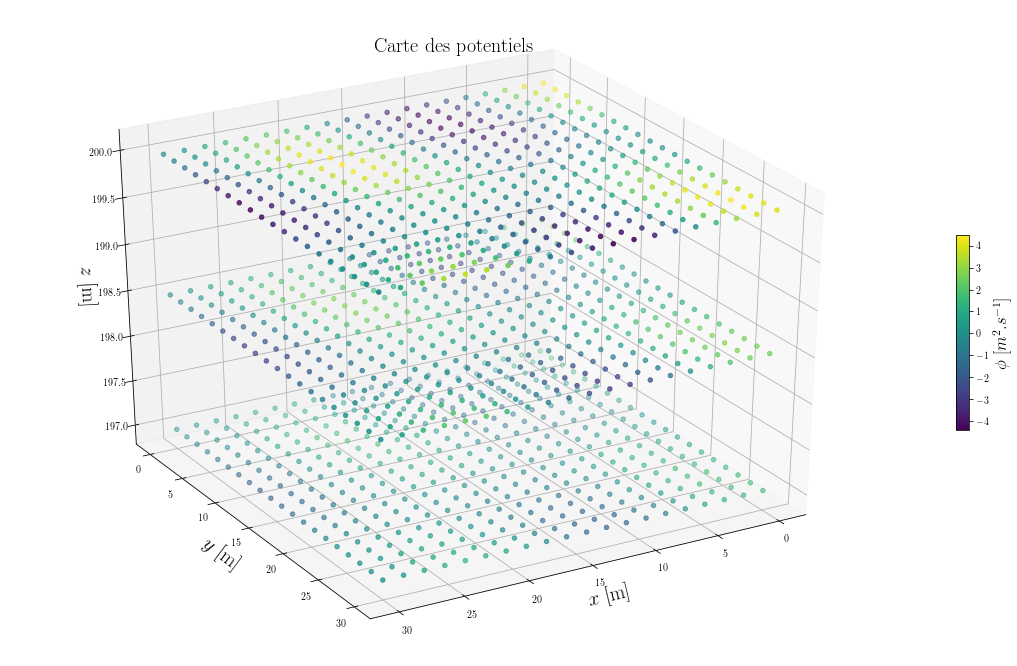

In [139]:
# VAGUE 1 (petite vague)
H1 = .8 #.7 # hauteur de la perturbation d'eau (en mètres) [PARAMÈTRE]
l1 = 20 # 7 # longueur d'onde en mètres [PARAMÈTRE]
nk1 = (2*np.pi)/l1 # nombre d'onde
alpha1 = -.06325617 # -.06325617 # direction (en radians)
k1 = [np.cos(alpha1)*nk1,np.sin(alpha1)*nk1] # vecteur d'onde
omega1 = np.sqrt(g*nk1*(1+(nk1*lc)**2)*np.tanh(h*nk1))
A1 = H1*g/(2*omega1)/np.cosh(nk1*h) # soumis à la condition h << H

# VAGUE 2 (grande vague)
H2 = .8 #.8
l2 = 20 # 30
nk2 = (2*np.pi)/l2
alpha2 = np.pi/4 # pi/5
k2 = [np.cos(alpha2)*nk2,np.cos(alpha2)*nk2]
omega2 = np.sqrt(g*nk2*(1+(nk2*lc)**2)*np.tanh(h*nk2))
A2 = H2*g/(2*omega2)/np.cosh(nk2*h)

# VAGUE 3
H3 = .8
l3 = 20
nk3 = (2*np.pi)/l3
alpha3 = -1/4*np.pi
k3 = [np.cos(alpha3)*nk3,np.sin(alpha3)*nk3]
omega3 = np.sqrt(g*nk3*(1+(nk3*lc)**2)*np.tanh(h*nk3))
A3 = H3*g/(2*omega3)/np.cosh(nk3*h)

# CARTE TRIDIMENSIONNELLE DU CHAMP SCALAIRE DES POTENTIELS
Xp, Yp, Zp = np.meshgrid(np.linspace(0, 30, 20),np.linspace(0, 30, 20),np.linspace(h-3, h, 3))
P1 = potentiel3d([Xp,Yp],Zp,k1,nk1,A1,omega1)
P2 = potentiel3d([Xp,Yp],Zp,k2,nk2,A2,omega2)
P3 = potentiel3d([Xp,Yp],Zp,k3,nk3,A3,omega3)
P = P1 + P2



# créer la figure

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=[20, 12])
ax = fig.add_subplot(111, projection='3d')



# créer les données

# j'ai essayé de créer un plan des potentiels et de mettre un offset comme pour la projection de la carte
# de la hauteur dans les graphes suivants, mais sans succès
# cset = ax.contourf(Xp, Yp, 199, 20, zdir='z', offset=+199, cmap=gloubi, antialiased=True)


carte_potentiels = ax.scatter3D(Xp, Yp, Zp, c=P.flatten(), marker='o', depthshade=True, cmap=plt.cm.viridis) #YlGnBu_r
bar = fig.colorbar(carte_potentiels, shrink=0.3, aspect=15)
bar.set_label("$\phi$ [$m^2.s^{-1}$]", fontsize=17)


ax.set_xlabel('$x$ [m]', fontsize=20)
ax.set_ylabel('$y$ [m]', fontsize=20)
ax.set_zlabel('$z$ [m]', fontsize=20)
ax.set_title('Carte des potentiels', fontsize=20)

ax.view_init(elev=30, azim=60)
#plt.savefig(chemin+'potentiels3D.pdf',  bbox_inches='tight', dpi=500, facecolor='w', edgecolor='w',orientation='portrait')

### Tracé de la surface de l'océan *seule*
et une tentative d'incruster sur un plan de côté la carte des potentiels
projections sur https://matplotlib.org/3.1.1/gallery/mplot3d/contour3d_3.html

In [12]:
# VAGUE 1 (petite vague)
H1 = .6 #.7 # hauteur de la perturbation d'eau (en mètres) [PARAMÈTRE]
l1 = 20 # 7 # longueur d'onde en mètres [PARAMÈTRE]
nk1 = (2*np.pi)/l1 # nombre d'onde
alpha1 = 0 # -.06325617 # direction (en radians)
k1 = [np.cos(alpha1)*nk1,np.sin(alpha1)*nk1] # vecteur d'onde
omega1 = np.sqrt(g*nk1*(1+(nk1*lc)**2)*np.tanh(h*nk1))
A1 = H1*g/(2*omega1)/np.cosh(nk1*h) # soumis à la condition h << H

# VAGUE 2 (grande vague)
H2 = .4 #.8
l2 = 18 # 30
nk2 = (2*np.pi)/l2
alpha2 = np.pi/4 # pi/5
k2 = [np.cos(alpha2)*nk2,np.cos(alpha2)*nk2]
omega2 = np.sqrt(g*nk2*(1+(nk2*lc)**2)*np.tanh(h*nk2))
A2 = H2*g/(2*omega2)/np.cosh(nk2*h)

# VAGUE 3
H3 = .8
l3 = 25
nk3 = (2*np.pi)/l3
alpha3 = -1/4*np.pi
k3 = [np.cos(alpha3)*nk3,np.sin(alpha3)*nk3]
omega3 = np.sqrt(g*nk3*(1+(nk3*lc)**2)*np.tanh(h*nk3))
A3 = H3*g/(2*omega3)/np.cosh(nk3*h)

# VAGUE 4 (grande vague)
H4 = .5 #.8
l4 = 15 # 30
nk4 = (2*np.pi)/l4
alpha4 = np.pi/2 # pi/5
k4 = [np.cos(alpha4)*nk4,np.cos(alpha4)*nk4]
omega4 = np.sqrt(g*nk4*(1+(nk4*lc)**2)*np.tanh(h*nk4))
A4 = H4*g/(2*omega4)/np.cosh(nk4*h)

xmin=0
xmax=60
ymin=0
ymax=60
zmin=194
zmax=201.5

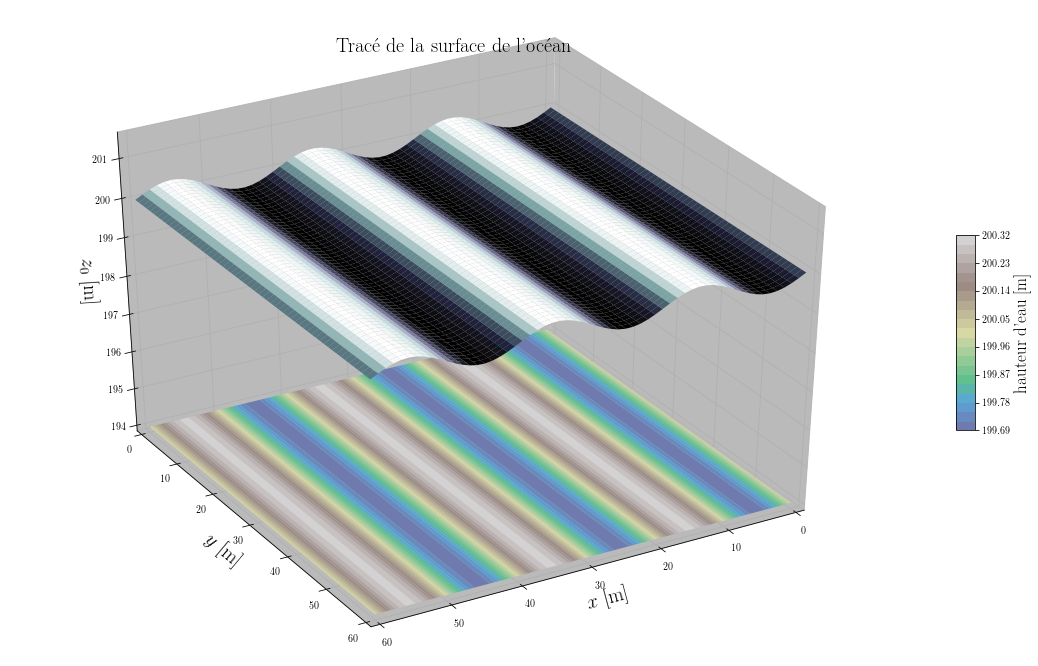

In [13]:
# CARTE BIDIMENSIONNELLE DE LA SURFACE DE L'OCÉAN
Xs, Ys = np.meshgrid(np.linspace(xmin, xmax, 60), np.linspace(ymin, ymax, 60))
Z1 = surface3d([Xs,Ys],k1,H1,omega1)
Z2 = surface3d([Xs,Ys],k2,H2,omega2)
Z3 = surface3d([Xs,Ys],k3,H3,omega3)
Z4 = surface3d([Xs,Ys],k4,H4,omega4)
S = h + Z1 #+ Z2 + Z3 + Z4

# CARTE BIDIMENSIONNELLE DES POTENTIELS
Xp, Zp = np.meshgrid(np.linspace(0, xmax, 60), np.linspace(zmin, zmax, 60))
P1 = potentiel3d([Xp,0],Zp,k1,nk1,A1,omega1)
P2 = potentiel3d([Xp,0],Zp,k2,nk2,A2,omega2)
P3 = potentiel3d([Xp,0],Zp,k3,nk3,A3,omega3)
P4 = potentiel3d([Xp,0],Zp,k4,nk4,A4,omega4)
P = P1 #+ P2 + P3 + P4


# FIGURE
fig00 = plt.figure(figsize=(20, 12))

# ax00 = plt.subplot(projection='3d')
ax00 = fig00.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('white')
ax00.w_xaxis.set_pane_color((0.7, 0.7, 0.7, 0.9))
ax00.w_yaxis.set_pane_color((0.7, 0.7, 0.7, 0.9))
ax00.w_zaxis.set_pane_color((0.7, 0.7, 0.7, 0.9))

# ax = fig.gca(projection='3d')
# ax00 = plt.axes(projection='3d')
ax00.set_xlabel('$x$ [m]', fontsize=20)
ax00.set_ylabel('$y$ [m]', fontsize=20)
ax00.set_zlabel('$z_0$ [m]', fontsize=20)
ax00.set_title('Tracé de la surface de l\'océan', fontsize=20)

ax00.set_xlim(0, ymax)
ax00.set_ylim3d(0, ymax)
ax00.set_zlim3d(zmin,zmax)


# Plot de la surface

ls = LightSource(azdeg=230, altdeg=60)
couleurs = ls.shade(S, cmap=cm.bone, vert_exag=1, blend_mode='soft')
surf = ax00.plot_surface(Xs, Ys, S, rstride=1, cstride=1, facecolors=couleurs, linewidth=0, alpha=1, antialiased=True, shade=False)

# Plot du champ des hauteurs en projection en bas
gloubi = modif_couleur(lambda x: x/2 + 0.35, cm.terrain) # ou gist_earth
heau = ax00.contourf(Xs, Ys, S, 20, zdir='z', offset=zmin, cmap=gloubi, antialiased=True)
bar = fig00.colorbar(heau, shrink=0.3, aspect=10)
bar.set_label('hauteur d\'eau [m]', fontsize=17)


# Plot du champ des potentiels en projection sur le plan Oxz

pot = ax00.contourf(Xp, Zp, P, 30, zdir='z', offset=0, cmap=cm.gist_earth, antialiased=True)


ax00.view_init(elev=35, azim=60)
plt.savefig(chemin+'surface_ocean.pdf',  bbox_inches='tight', dpi=500, facecolor='w', edgecolor='w',orientation='portrait')

### Une tranche d'océan

NameError: name 'vitesses' is not defined

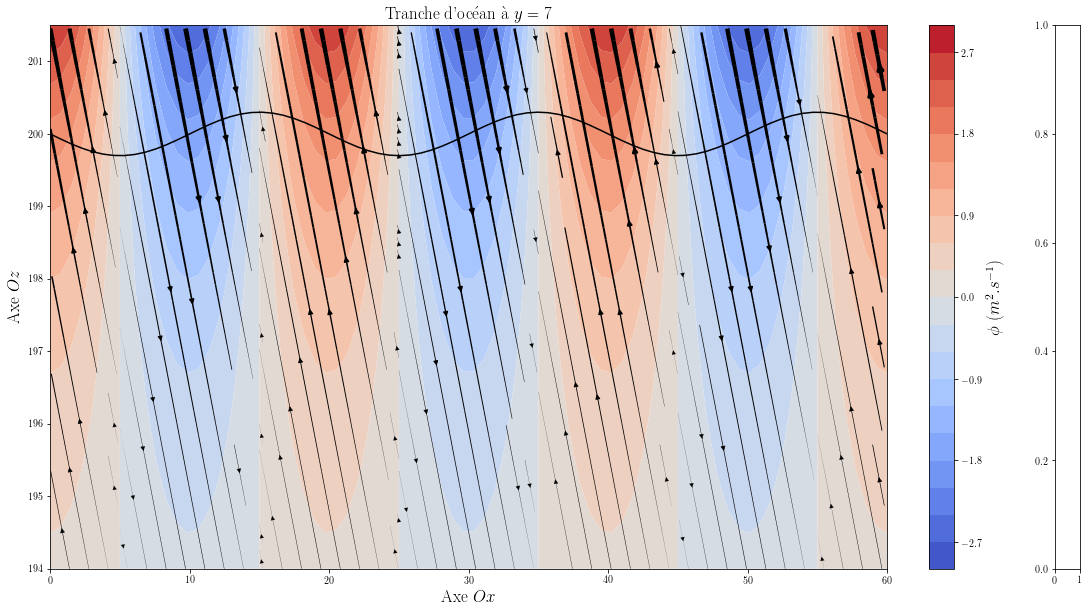

In [14]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# définition des graphes
fig, ax = plt.subplots(1, 1, figsize=[15, 10])
ax.grid(False)
# ajout des textes
plt.ylabel('Axe $Oz$', fontsize=17)
plt.xlabel('Axe $Ox$', fontsize=17)

yp=7
ax.set_title('Tranche d\'océan à $y=$ '+str(yp), fontsize=17)
ax.set_ylim(zmin, zmax)



X = np.linspace(xmin, xmax, 80)
Y = np.linspace(yp, yp, 1)
Z = np.linspace(zmin, zmax, 80)

# TRACÉ DE LA SURFACE
S1 = surface3d([X,yp],k1,H1,omega1)
S2 = surface3d([X,yp],k2,H2,omega2)
S3 = surface3d([X,yp],k3,H3,omega3)
S4 = surface3d([X,yp],k4,H4,omega4)
S = h+ S1 #+ S2 + S3 + S4


# CHAMP SCALAIRE DES POTENTIELS
Xp, Zp = np.meshgrid(X,Z)
P1 = potentiel3d([Xp,yp],Zp,k1,nk1,A1,omega1)
P2 = potentiel3d([Xp,yp],Zp,k2,nk2,A2,omega2)
P3 = potentiel3d([Xp,yp],Zp,k3,nk3,A3,omega3)
P4 = potentiel3d([Xp,yp],Zp,k4,nk4,A4,omega4)
P = P1 #+ P2 + P3 + P4

# CHAMP VECTORIEL DES VITESSES
Xv, Zv = np.meshgrid(np.linspace(xmin, xmax, 60),np.linspace(zmin, zmax, 60))
Vx1, Vy1, Vz1 = vitesse3d([Xv,yp],Zv,k1,nk1,A1,omega1)
Vx2, Vy2, Vz2 = vitesse3d([Xv,yp],Zv,k2,nk2,A2,omega2)
Vx3, Vy3, Vz3 = vitesse3d([Xv,yp],Zv,k3,nk3,A3,omega3)
Vx4, Vy4, Vz4 = vitesse3d([Xv,yp],Zv,k4,nk4,A4,omega4)
Vx = Vx1 #+ Vx2 + Vx3 + Vx4
Vz = Vz1 #+ Vz2 + Vz3 + Vz4

M = np.hypot(Vx, Vz) # matrice des normes des vitesses
M[M == 0] = 1 # empecher les erreurs de division par 0
# vX /= M # M avant, normalisation de chaque vecteur
# vZ /= M

# AXES SECONDAIRES
axinsR = inset_axes(ax, width="3%", height="100%", loc='lower left',
                   bbox_to_anchor=(1.05, 0, 1, 1), bbox_transform=ax.transAxes, borderpad=0)
axinsQ = inset_axes(ax, width="3%", height="100%", loc='lower left',
                   bbox_to_anchor=(1.2, 0, 1, 1), bbox_transform=ax.transAxes, borderpad=0)


# TRACÉ DE LA SURFACE
surfaces = ax.plot(X,S, color='black')

# CHAMP SCALAIRE DES POTENTIELS
potentiels = ax.contourf(Xp, Zp, P, 20, cmap=cm.coolwarm, antialiased=True)

barP = fig.colorbar(potentiels, extend='max', cax=axinsR, aspect=20)
barP.set_label("$\phi$ ($m^2.s^{-1}$)", fontsize=17)

# CHAMP VECTORIEL DES VITESSES
#vitesses = ax.quiver(Xv,Zv,Vx,Vz, M, pivot='middle', cmap='Greys_r')
lw = 5*M / M.max()
V = ax.streamplot(Xv,Zv,Vx,Vz, density=1.5, color='black', linewidth=lw)


barV = fig.colorbar(vitesses,extend='max', orientation='vertical', aspect=10, cax=axinsQ)
barV.set_label("$\|\overrightarrow{v}\|$ ($m.s^{-1}$)", fontsize=17)

plt.savefig(chemin+'tranche_ocean.pdf', dpi=500, bbox_inches='tight', facecolor='w', edgecolor='w',orientation='portrait')

### Surface de l'océan 3D avec des équipotentielles

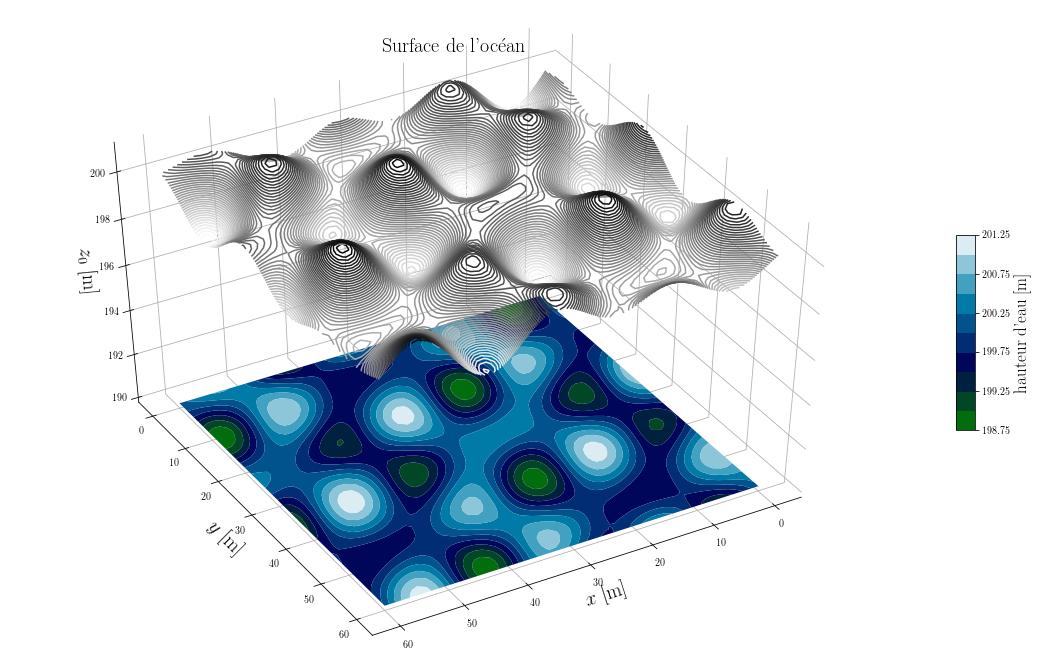

In [49]:
# VAGUE 1 (petite vague)
H1 = .8 #.7 # hauteur de la perturbation d'eau (en mètres) [PARAMÈTRE]
l1 = 18 # 7 # longueur d'onde en mètres [PARAMÈTRE]
nk1 = (2*np.pi)/l1 # nombre d'onde
alpha1 = -.06325617 # -.06325617 # direction (en radians)
k1 = [np.cos(alpha1)*nk1,np.sin(alpha1)*nk1] # vecteur d'onde
omega1 = np.sqrt(g*nk1*(1+(nk1*lc)**2)*np.tanh(h*nk1))
A1 = H1*g/(2*omega1)/np.cosh(nk1*h) # soumis à la condition h << H

# VAGUE 2 (grande vague)
H2 = .8 #.8
l2 = 22 # 30
nk2 = (2*np.pi)/l2
alpha2 = np.pi/4 # pi/5
k2 = [np.cos(alpha2)*nk2,np.cos(alpha2)*nk2]
omega2 = np.sqrt(g*nk2*(1+(nk2*lc)**2)*np.tanh(h*nk2))
A2 = H2*g/(2*omega2)/np.cosh(nk2*h)

# VAGUE 3
H3 = .8
l3 = 15
nk3 = (2*np.pi)/l3
alpha3 = -1/4*np.pi
k3 = [np.cos(alpha3)*nk3,np.sin(alpha3)*nk3]
omega3 = np.sqrt(g*nk3*(1+(nk3*lc)**2)*np.tanh(h*nk3))
A3 = H3*g/(2*omega3)/np.cosh(nk3*h)

# VAGUE 4 (grande vague)
H4 = 10 #.8
l4 = 6 # 30
nk4 = (2*np.pi)/l4
alpha4 = np.pi/2 # pi/5
k4 = [np.cos(alpha4)*nk4,np.cos(alpha4)*nk4]
omega4 = np.sqrt(g*nk4*(1+(nk4*lc)**2)*np.tanh(h*nk4))
A4 = H4*g/(2*omega4)/np.cosh(nk4*h)

# CARTE BIDIMENSIONNELLE DE LA SURFACE DE L'OCÉAN
Xs, Ys = np.meshgrid(np.linspace(0, 60, 60), np.linspace(0, 60, 60))
Z1 = surface3d([Xs,Ys],k1,H1,omega1)
Z2 = surface3d([Xs,Ys],k2,H2,omega2)
Z3 = surface3d([Xs,Ys],k3,H3,omega3)
Z4 = surface3d([Xs,Ys],k4,H4,omega4)
Sf = h + Z1 + Z2 + Z3 + Z4


# FIGURE

from mpl_toolkits.mplot3d import Axes3D

fig00 = plt.figure(figsize=(20, 12))

ax00 = fig00.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('white')
ax00.w_xaxis.set_pane_color((1,1,1))
ax00.w_yaxis.set_pane_color((1,1,1))
ax00.w_zaxis.set_pane_color((1,1,1))

ax00.set_xlabel('$x$ [m]', fontsize=20)
ax00.set_ylabel('$y$ [m]', fontsize=20)
ax00.set_zlabel('$z_0$ [m]', fontsize=20)
ax00.set_title('Surface de l\'océan', fontsize=20)
ax00.set_zlim3d(190,201)


surf = ax00.contour3D(Xs, Ys, Sf, 50,cmap='binary', alpha=1, antialiased=True)
heau = ax00.contourf(Xs, Ys, Sf, 10, zdir='z', offset=+190, cmap=cm.ocean, antialiased=True)
bar = fig00.colorbar(heau, shrink=0.3, aspect=10)
bar.set_label('hauteur d\'eau [m]', fontsize=17)

ax00.view_init(elev=45, azim=60)
# plt.savefig(chemin+'surface_ocean3D_equipotentielles.pdf',  bbox_inches='tight', dpi=500, facecolor='w', edgecolor='w',orientation='portrait')

### Surface de l'océan *en montrant la superposition*
Superposition de plusieurs vagues se propageant dans des directions différentes

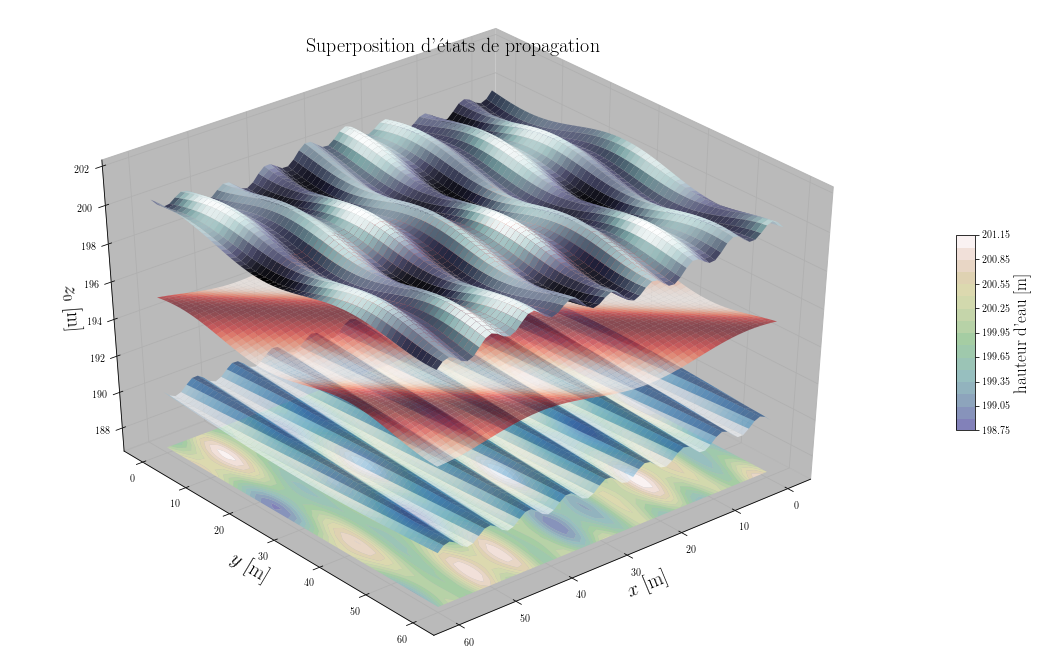

In [90]:
# VAGUE 1 (petite vague)
H1 = .7 #.7 # hauteur de la perturbation d'eau (en mètres) [PARAMÈTRE]
l1 = 7 # 7 # longueur d'onde en mètres [PARAMÈTRE]
nk1 = (2*np.pi)/l1 # nombre d'onde
alpha1 = -.06325617 # -.06325617 # direction (en radians)
k1 = [np.cos(alpha1)*nk1,np.sin(alpha1)*nk1] # vecteur d'onde
omega1 = np.sqrt(g*nk1*(1+(nk1*lc)**2)*np.tanh(h*nk1))
A1 = H1*g/(2*omega1)/np.cosh(nk1*h) # soumis à la condition h << H

# VAGUE 2 (grande vague)
H2 = .8 #.8
l2 = 30 # 30
nk2 = (2*np.pi)/l2
alpha2 = np.pi/5 # pi/5
k2 = [np.cos(alpha2)*nk2,np.cos(alpha2)*nk2]
omega2 = np.sqrt(g*nk2*(1+(nk2*lc)**2)*np.tanh(h*nk2))
A2 = H2*g/(2*omega2)/np.cosh(nk2*h)



# CARTE BIDIMENSIONNELLE DE LA SURFACE DE L'OCÉAN
Xs, Ys = np.meshgrid(np.linspace(0, 60, 60), np.linspace(0, 60, 60))
Z1 = surface([Xs,Ys],k1,H1,omega1)
Z2 = surface([Xs,Ys],k2,H2,omega2)
Z3 = surface([Xs,Ys],k3,H3,omega3)
Z4 = surface([Xs,Ys],k4,H4,omega4)
S = h + Z1 + Z2 + Z3 + Z4


# FIGURE
# PARAMÉTRER LA FIGURE
fig00 = plt.figure(figsize=(20, 12))

# ax00 = plt.subplot(projection='3d')
ax00 = fig00.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('white')
ax00.w_xaxis.set_pane_color((0.7, 0.7, 0.7, 0.9))
ax00.w_yaxis.set_pane_color((0.7, 0.7, 0.7, 0.9))
ax00.w_zaxis.set_pane_color((0.7, 0.7, 0.7, 0.9))

# ax = fig.gca(projection='3d')
ax00.set_xlabel('$x$ [m]', fontsize=20)
ax00.set_ylabel('$y$ [m]', fontsize=20)
ax00.set_zlabel('$z_0$ [m]', fontsize=20)
ax00.set_title('Superposition d\'états de propagation', fontsize=20)
ax00.set_zlim3d(187,202)


# SOURCE DE LUMIÈRE
ls = LightSource(azdeg=230, altdeg=60)
couleurs = ls.shade(S, cmap=cm.bone, vert_exag=1, blend_mode='soft')

# SURFACES ADDITIONNELLES POUR MONTRER LA SUPERPOSITION
surface1 = ax00.plot_surface(Xs, Ys, h+Z1-10, rstride=1, cstride=1, cmap=cm.Blues, linewidth=0, alpha=.6, antialiased=True, shade=False)
surface2 = ax00.plot_surface(Xs, Ys, h+Z2-5, rstride=1, cstride=1, cmap=cm.Reds, linewidth=0, alpha=.6, antialiased=True, shade=False)

surf = ax00.plot_surface(Xs, Ys, h+Z1+Z2, rstride=1, cstride=1, facecolors=couleurs, linewidth=0, alpha=1, antialiased=True, shade=False)

# MONTRER LA DENSITÉ DE HAUTEUR EN PROJECTION EN DESSOUS
gloubi_col = modif_couleur(lambda x: x/2 + 0.5, cm.gist_earth) # ou gist_earth
heau = ax00.contourf(Xs, Ys, S, 20, zdir='z', offset=+187, cmap=gloubi_col, antialiased=True)
bar = fig00.colorbar(heau, shrink=0.3, aspect=10)
bar.set_label('hauteur d\'eau [m]', fontsize=17)

# ORIENTATION ET SAUVEGARDE
ax00.view_init(elev=37.5, azim=50)
plt.savefig(chemin+'surface_ocean3D_somme.pdf',  bbox_inches='tight', dpi=500, facecolor='w', edgecolor='w',orientation='portrait')

Pour animer
https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c